In [1]:
import matplotlib.pyplot as plt

In [2]:
from IPython import display

In [3]:
import gym

In [4]:
%matplotlib inline

In [5]:
!nvidia-smi

Thu Oct  4 16:46:34 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 384.145                Driver Version: 384.145                   |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla V100-DGXS...  Off  | 00000000:07:00.0  On |                    0 |
| N/A   26C    P0    36W / 300W |     62MiB / 16146MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  Tesla V100-DGXS...  Off  | 00000000:08:00.0 Off |                    0 |
| N/A   26C    P0    36W / 300W |     10MiB / 16149MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  T

# create environment

In [59]:
def env_info (env):
    env.reset()
    observation, reward, done, info = env.step(env.action_space.sample()) 
    print( str(env.spec.id) + '= environment ')
    print('   action space: ' + str(env.action_space.n))
    print('   obs shape: ' + str(observation.shape))
    print('   current reward: ' + str(reward))
    print('   info: ' + str(info))

In [60]:
env = gym.make('KungFuMaster-v0') # 210, 160, 3 :: 14 actions
env_info(env)

KungFuMaster-v0= environment 
   action space: 14
   obs shape: (210, 160, 3)
   current reward: 0.0
   info: {'ale.lives': 4}


# advance player to starting position

In [86]:
env.reset();
if 'KungFuMaster' in  env.spec.id:    
    for i in range(120): # 120 noOps needed to advance player past game intro
        env.step(env.action_space.sample())    

# model inference & action loop 

In [130]:
def viz_state( env, step=0, info=""):
    plt.figure(10)
    plt.clf()
    plt.imshow(env.render(mode='rgb_array'))
    plt.title("%s | Step: %d %s" % (env.spec.id,step, info))
    plt.axis('off')

    display.clear_output(wait=True)
    display.display(plt.gcf())        

In [ ]:
def log ( observation, reward, done, info ):
    # todo tensorboard
    pass 

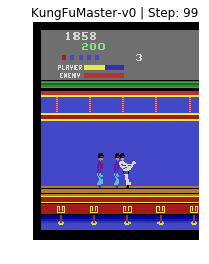

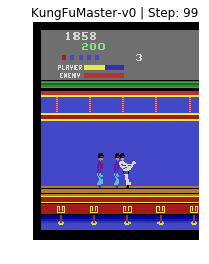

In [148]:
if 'KungFuMaster' in  env.spec.id:    
    for i in range(200):
        chosenAction = env.action_space.sample() # TODO: run model inference
        observation, reward, done, info = env.step( chosenAction )
        log( observation, reward, done, info )
        viz_state(env, i)

# A2C PPO w/ curiosity

In [132]:
-- TODO add PPO from pytorch-rl [ TF only has frozen weights? ] -- i.e. not trainable?

Object `trainable` not found.
